Base de dados : https://www.tesourotransparente.gov.br/ckan/dataset

In [20]:
import pandas as pd
pd.set_option("display.max_colwidth", 150)
pd.set_option("display.min_rows", 20)

import matplotlib
matplotlib.rcParams['figure.figsize'] = (36,16)

1. Funções para busca e tratamento de dados do tesouro direto

In [21]:
def busca_titulos_tesouro_direto():
    url = 'https://www.tesourotransparente.gov.br/ckan/dataset/df56aa42-484a-4a59-8184-7676580c81e3/resource/796d2059-14e9-44e3-80c9-2d9e30b405c1/download/PrecoTaxaTesouroDireto.csv'
    df = pd.read_csv(url, sep=';', decimal=',')
    df['Data Vencimento'] = pd.to_datetime(df['Data Vencimento'], dayfirst=True)
    df['Data Base'] = pd.to_datetime(df['Data Base'], dayfirst=True)
    multi_indice = pd.MultiIndex.from_frame(df.iloc[:,:3])
    df = df.set_index(multi_indice).iloc[:, 3:]
    return df

In [22]:
def busca_vendas_tesouro():
    url = 'https://www.tesourotransparente.gov.br/ckan/dataset/f0468ecc-ae97-4287-89c2-6d8139fb4343/resource/e5f90e3a-8f8d-4895-9c56-4bb2f7877920/download/VendasTesouroDireto.csv'
    df = pd.read_csv(url, sep=';', decimal=',')
    df['Vencimento do Titulo'] = pd.to_datetime(df['Vencimento do Titulo'], dayfirst=True)
    df['Data Venda'] = pd.to_datetime(df['Data Venda'], dayfirst=True)
    multi_indice = pd.MultiIndex.from_frame(df.iloc[:,:3])
    df = df.set_index(multi_indice).iloc[:, 3:]
    return df

In [23]:
def busca_recompras_tesouro():
    url = 'https://www.tesourotransparente.gov.br/ckan/dataset/f30db6e4-6123-416c-b094-be8dfc823601/resource/30c2b3f5-6edd-499a-8514-062bfda0f61a/download/RecomprasTesouroDireto.csv'
    df = pd.read_csv(url, sep=';', decimal=',')
    df['Vencimento do Titulo'] = pd.to_datetime(df['Vencimento do Titulo'], dayfirst=True)
    df['Data Resgate'] = pd.to_datetime(df['Data Resgate'], dayfirst=True)
    multi_indice = pd.MultiIndex.from_frame(df.iloc[:,:3])
    df = df.set_index(multi_indice).iloc[:, 3:]
    return df

2.Preços e Taxas Históricas dos Títulos Negociados
Esse conjunto de dados contêm as taxas e preços dos títulos ofertados pelo Tesouro Direto. Refletem o mercado secundário de títulos públicos federais.


2.1 Buscando dados

In [ ]:
titulos = busca_titulos_tesouro_direto()
titulos

In [ ]:
titulos.sort_index(inplace=True)
titulos

In [ ]:
tipos_titulos = titulos.index.droplevel(level=1).droplevel(level=1).drop_duplicates().tolist()
tipos_titulos

2.2 Tesouro Selic

In [24]:
data_venc = '2025-03-01'
selic2025 = titulos.loc[('Tesouro Selic',data_venc)]
selic2025

,Taxa Compra Manha,Taxa Venda Manha,PU Compra Manha,PU Venda Manha,PU Base Manha
Data Base,,,,,
2019-02-01,0.02,0.06,9926.99,9902.94,9900.45
2019-02-04,0.02,0.06,9929.43,9905.40,9902.91
2019-02-05,0.02,0.06,9931.88,9907.87,9905.36
2019-02-06,0.02,0.06,9934.34,9910.33,9907.83
2019-02-07,0.02,0.06,9936.79,9912.80,9910.29
2019-02-08,0.02,0.06,9939.25,9915.26,9912.76
2019-02-11,0.02,0.06,9941.70,9917.72,9915.22
2019-02-12,0.02,0.06,9944.16,9920.19,9917.68
2019-02-13,0.02,0.06,9946.61,9922.65,9920.15


<AxesSubplot:xlabel='Data Base'>

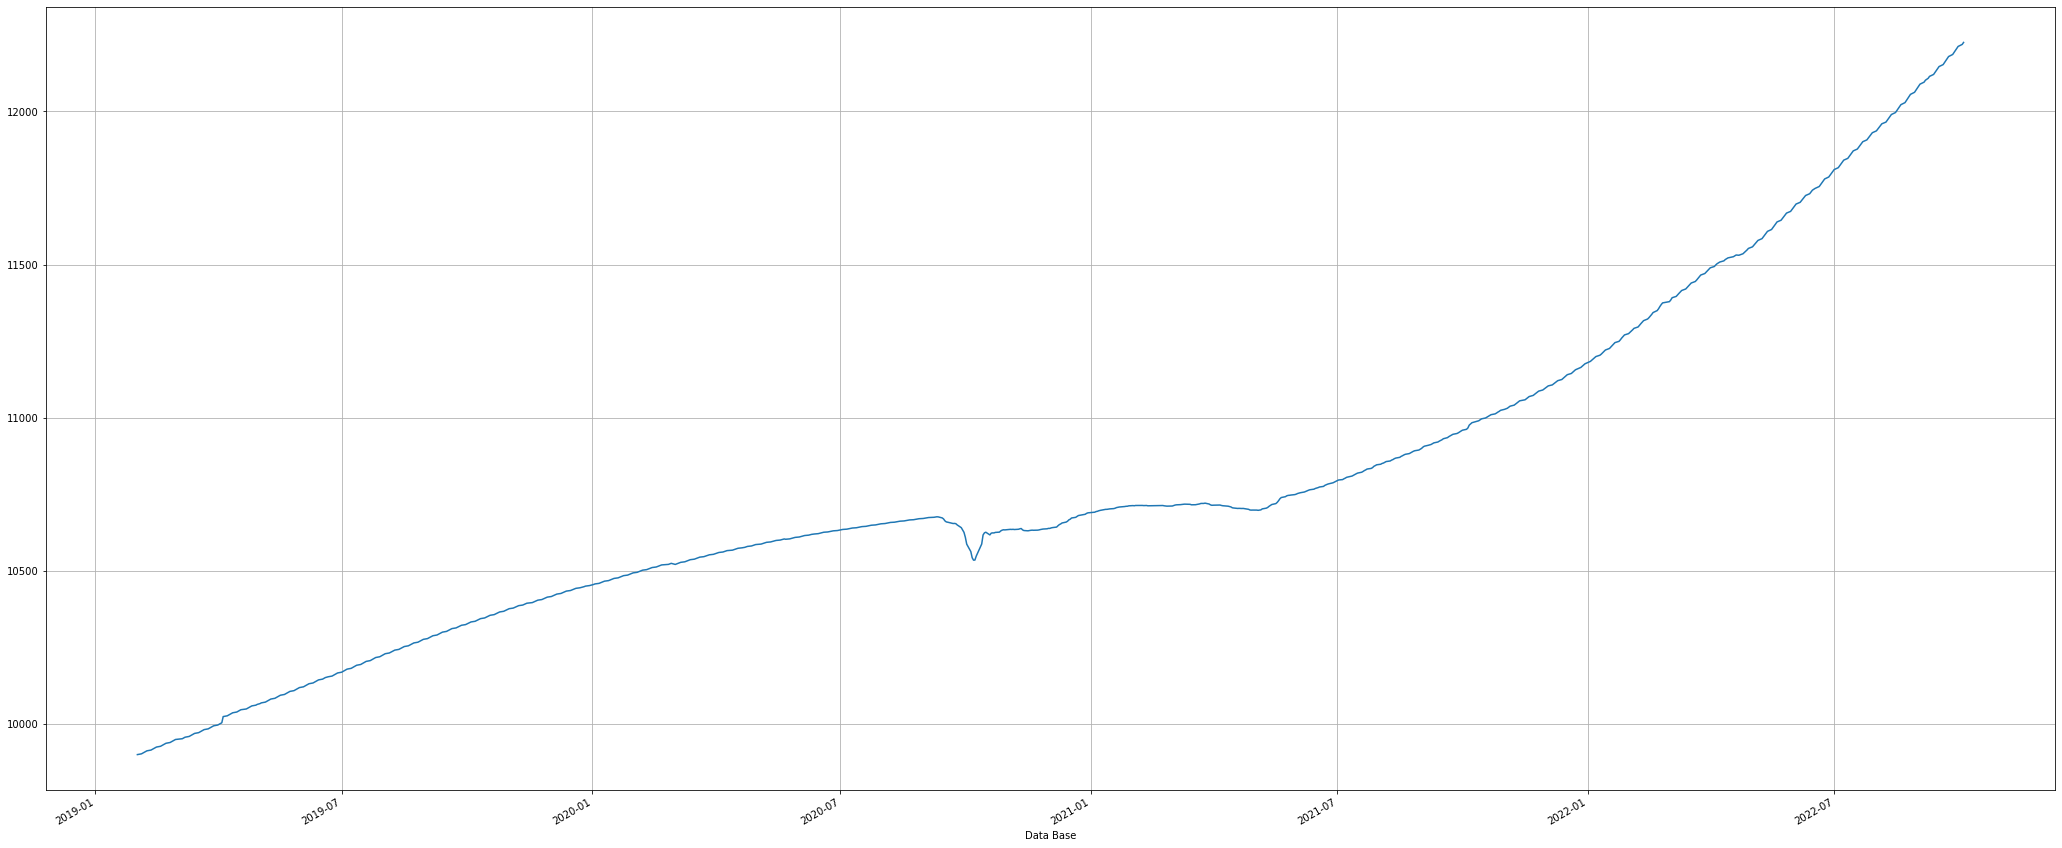

In [25]:
selic2025['PU Base Manha'].plot(grid=True)

<AxesSubplot:xlabel='Data Base'>

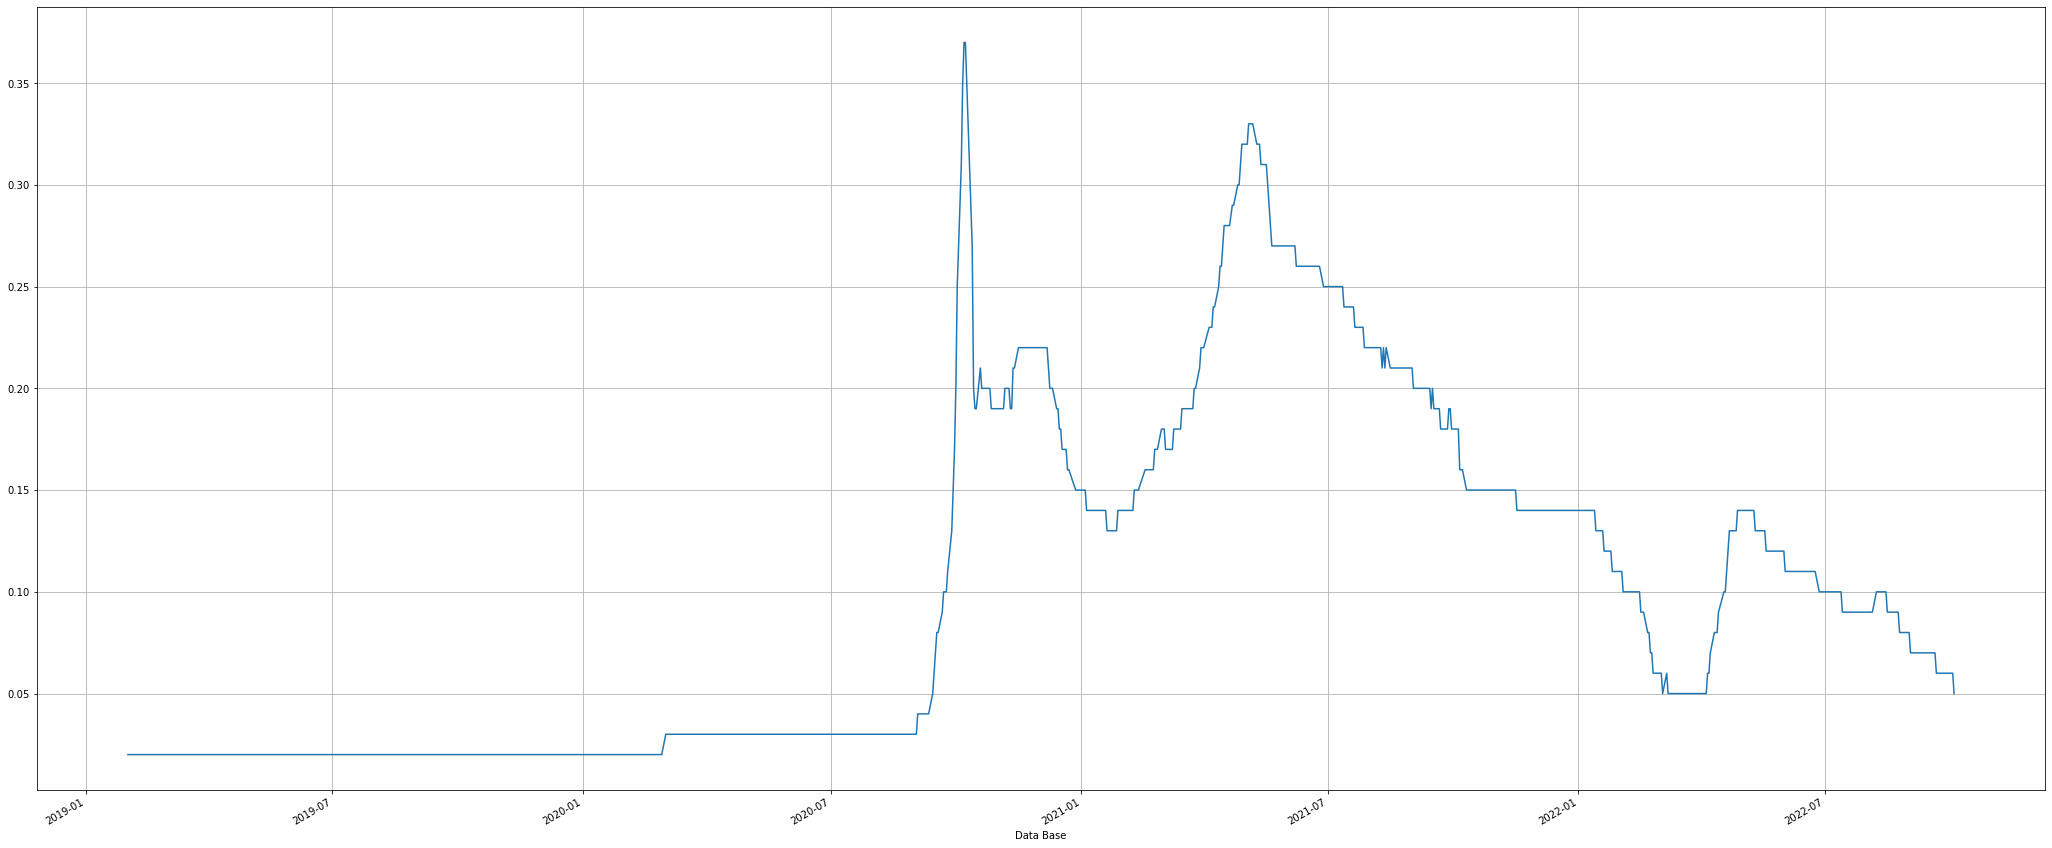

In [26]:
selic2025['Taxa Compra Manha'].plot(grid=True)

2.3 Pré-fixado 2023

In [27]:
pre2023 = titulos.loc[('Tesouro Prefixado', '2023-01-01')]
pre2023

,Taxa Compra Manha,Taxa Venda Manha,PU Compra Manha,PU Venda Manha,PU Base Manha
Data Base,,,,,
2016-01-26,16.59,16.65,346.72,345.49,345.28
2016-01-27,16.32,16.38,352.52,351.27,351.06
2016-01-28,16.42,16.48,350.65,349.41,349.20
2016-01-29,15.93,15.99,361.21,359.92,359.71
2016-02-01,15.89,15.95,362.28,360.99,360.78
2016-02-02,15.62,15.68,368.36,367.04,366.83
2016-02-03,15.90,15.96,362.49,361.20,360.99
2016-02-04,15.73,15.79,366.38,365.07,364.86
2016-02-05,15.99,16.05,360.98,359.70,359.49


<AxesSubplot:xlabel='Data Base'>

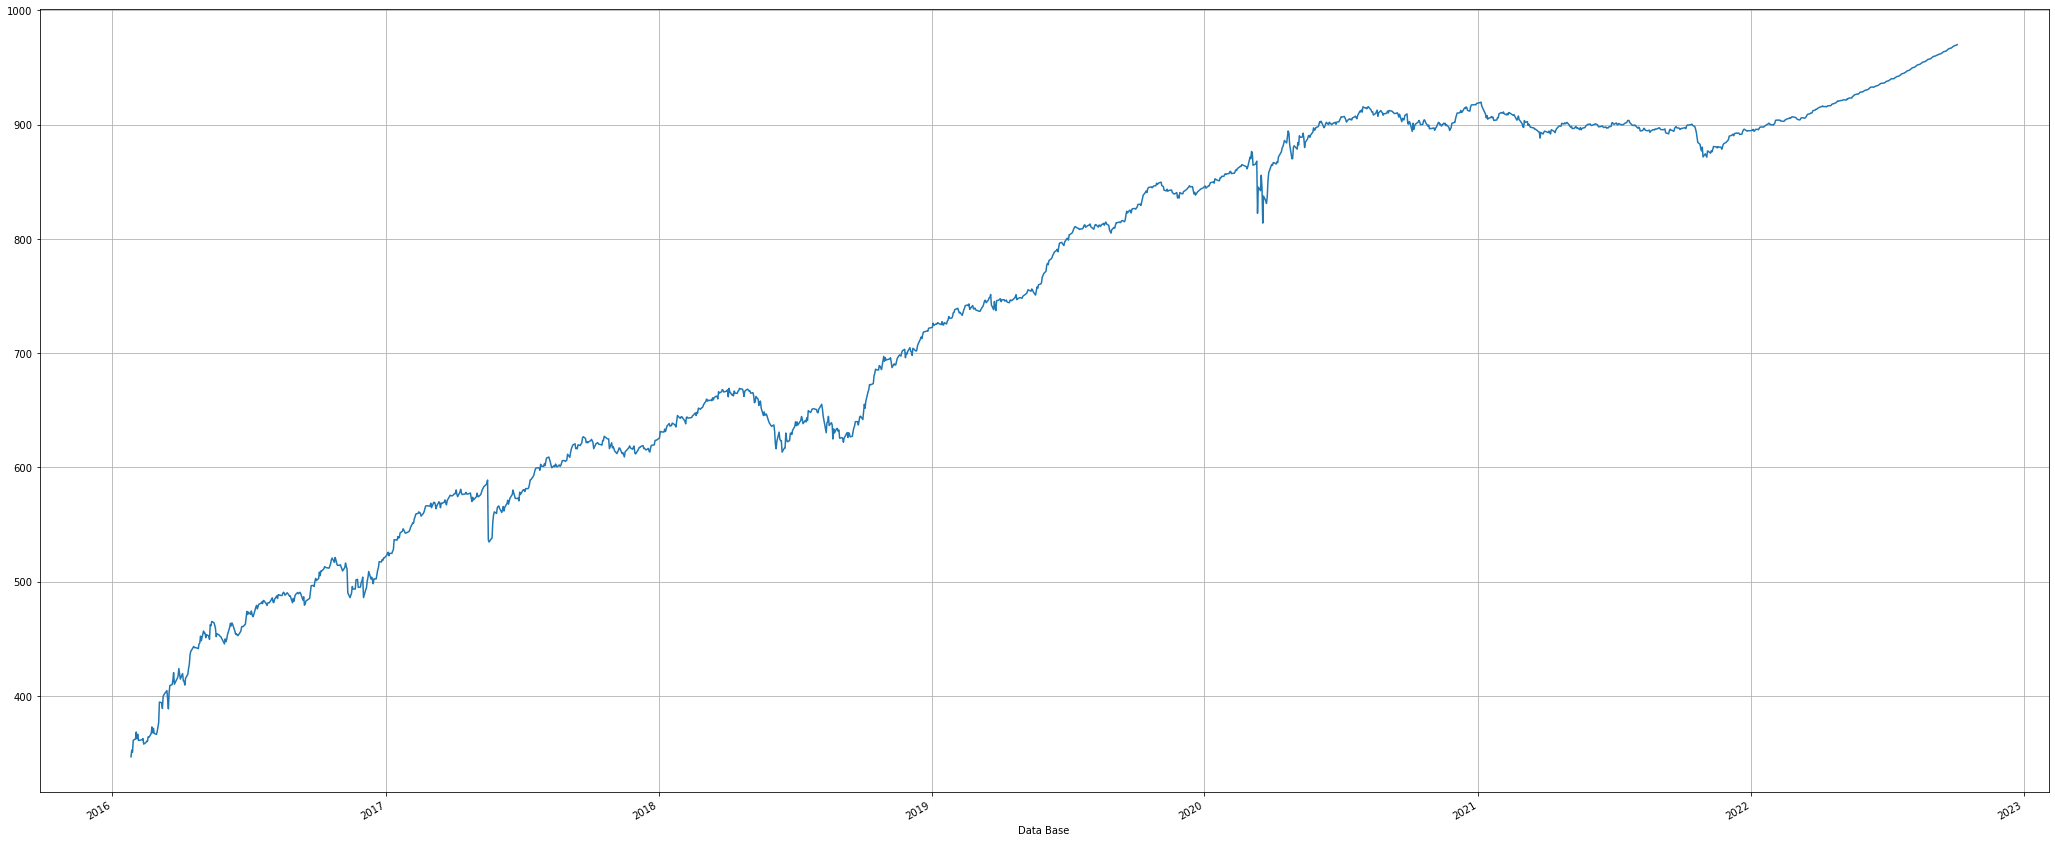

In [28]:
pre2023['PU Compra Manha'].plot(grid=True)

<AxesSubplot:xlabel='Data Base'>

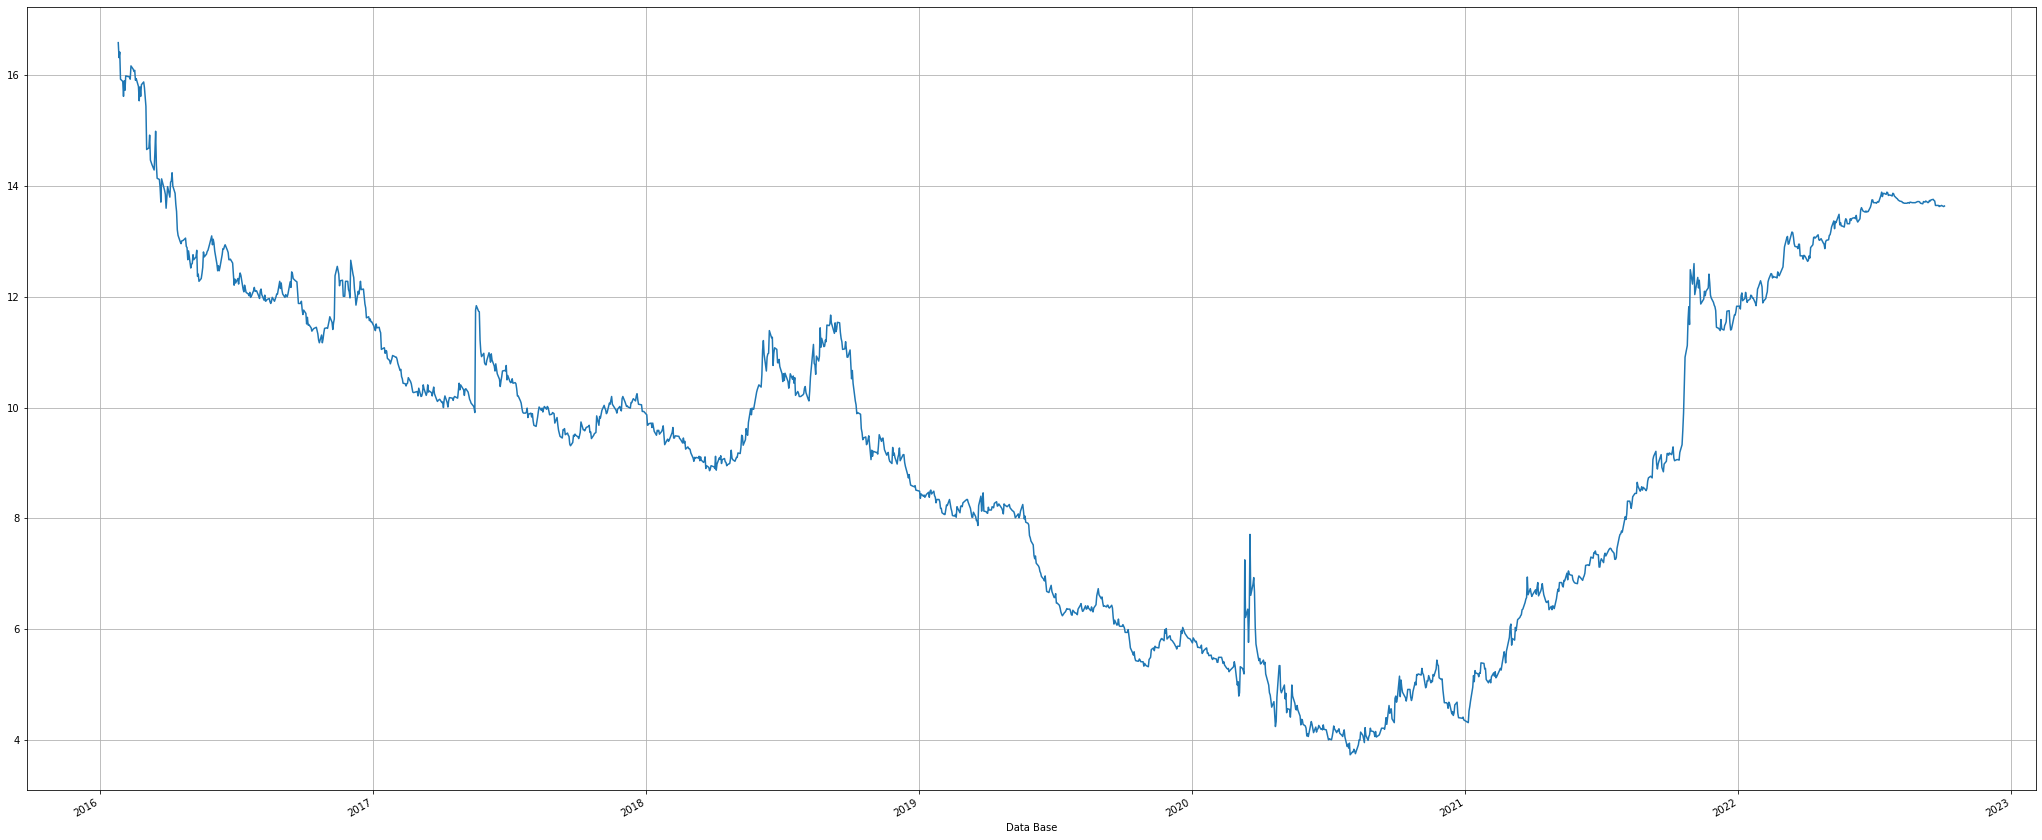

In [29]:
pre2023['Taxa Compra Manha'].plot(grid=True)

<AxesSubplot:xlabel='Data Base'>

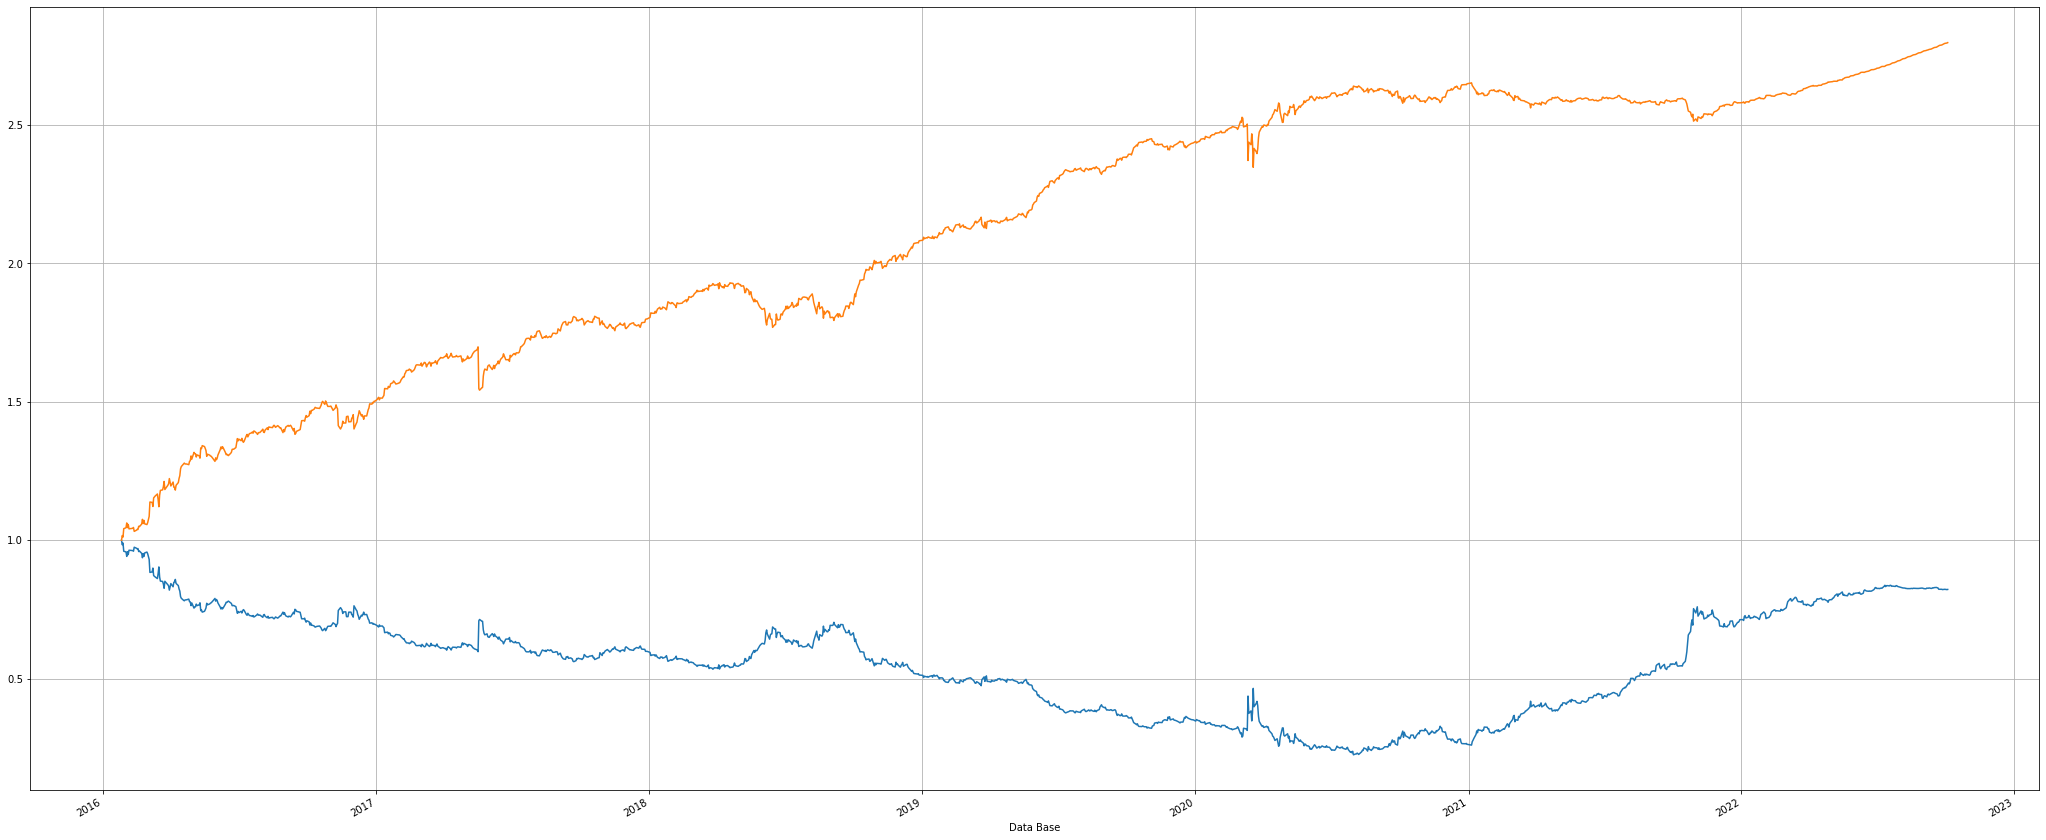

In [30]:
(pre2023['Taxa Compra Manha']/pre2023['Taxa Compra Manha'].iloc[0]).plot(grid=True)
(pre2023['PU Compra Manha']/pre2023['PU Compra Manha'].iloc[0]).plot(grid=True)

3. Vendas Tesouro Direto

Este conjunto de dados traz o volume de vendas diário do programa Tesouro Direto

3.1 Buscando dados

In [31]:
vendas = busca_vendas_tesouro()
vendas.sort_index(inplace=True)
vendas

PU  \
Tipo Titulo                        Vencimento do Titulo Data Venda                 
Tesouro IGPM+ com Juros Semestrais 2005-07-01           2002-01-07   1038.150000   
                                                        2002-01-08   1035.590000   
                                                        2002-01-09   1035.400000   
                                                        2002-01-14   1038.166666   
                                                        2002-01-15   1038.640000   
                                                        2002-01-16   1039.052173   
                                                        2002-01-17   1039.269911   
                                                        2002-01-18   1039.259574   
                                                        2002-01-21   1039.720000   
                                                        2002-01-22   1040.189743   
...                                                                          ...   
Tesouro Selic                      2027-03-01           2022-09-20  12091.860103   
                                                        2022-09-21  12098.452839   
                                                        2022-09-22  12105.045254   
                                                        2022-09-23  12111.642869   
                                                        2022-09-26  12118.423271   
                                                        2022-09-27  12125.552610   
                                                        2022-09-28  12132.812503   
                                                        2022-09-29  12139.572463   
                                                        2022-09-30  12146.303235   
                                                        2022-10-03  12152.601953   

                                                                    Quantidade  \
Tipo Titulo                        Vencimento do Titulo Data Venda               
Tesouro IGPM+ com Juros Semestrais 2005-07-01           2002-01-07        7.40   
                                                        2002-01-08        6.00   
                                                        2002-01-09        0.20   
                                                        2002-01-14        0.60   
                                                        2002-01-15        1.00   
                                                        2002-01-16       18.40   
                                                        2002-01-17       22.60   
                                                        2002-01-18        9.40   
                                                        2002-01-21       12.00   
                                                        2002-01-22        7.80   
...                                                                        ...   
Tesouro Selic                      2027-03-01           2022-09-20     3967.44   
                                                        2022-09-21     5250.09   
                                                        2022-09-22     3943.24   
                                                        2022-09-23     4472.85   
                                                        2022-09-26     4034.05   
                                                        2022-09-27     4311.50   
                                                        2022-09-28     3602.62   
                                                        2022-09-29     3180.22   
                                                        2022-09-30     3315.77   
                                                        2022-10-03     4350.45   

                                                                          Valor  
Tipo Titulo                        Vencimento do Titulo Data Venda               
Tesouro IGPM+ com Juros Semestrais 2005-07-01           2002-01-07      7682.31  
            

3.2 Gráficos

<AxesSubplot:xlabel='Data Venda'>

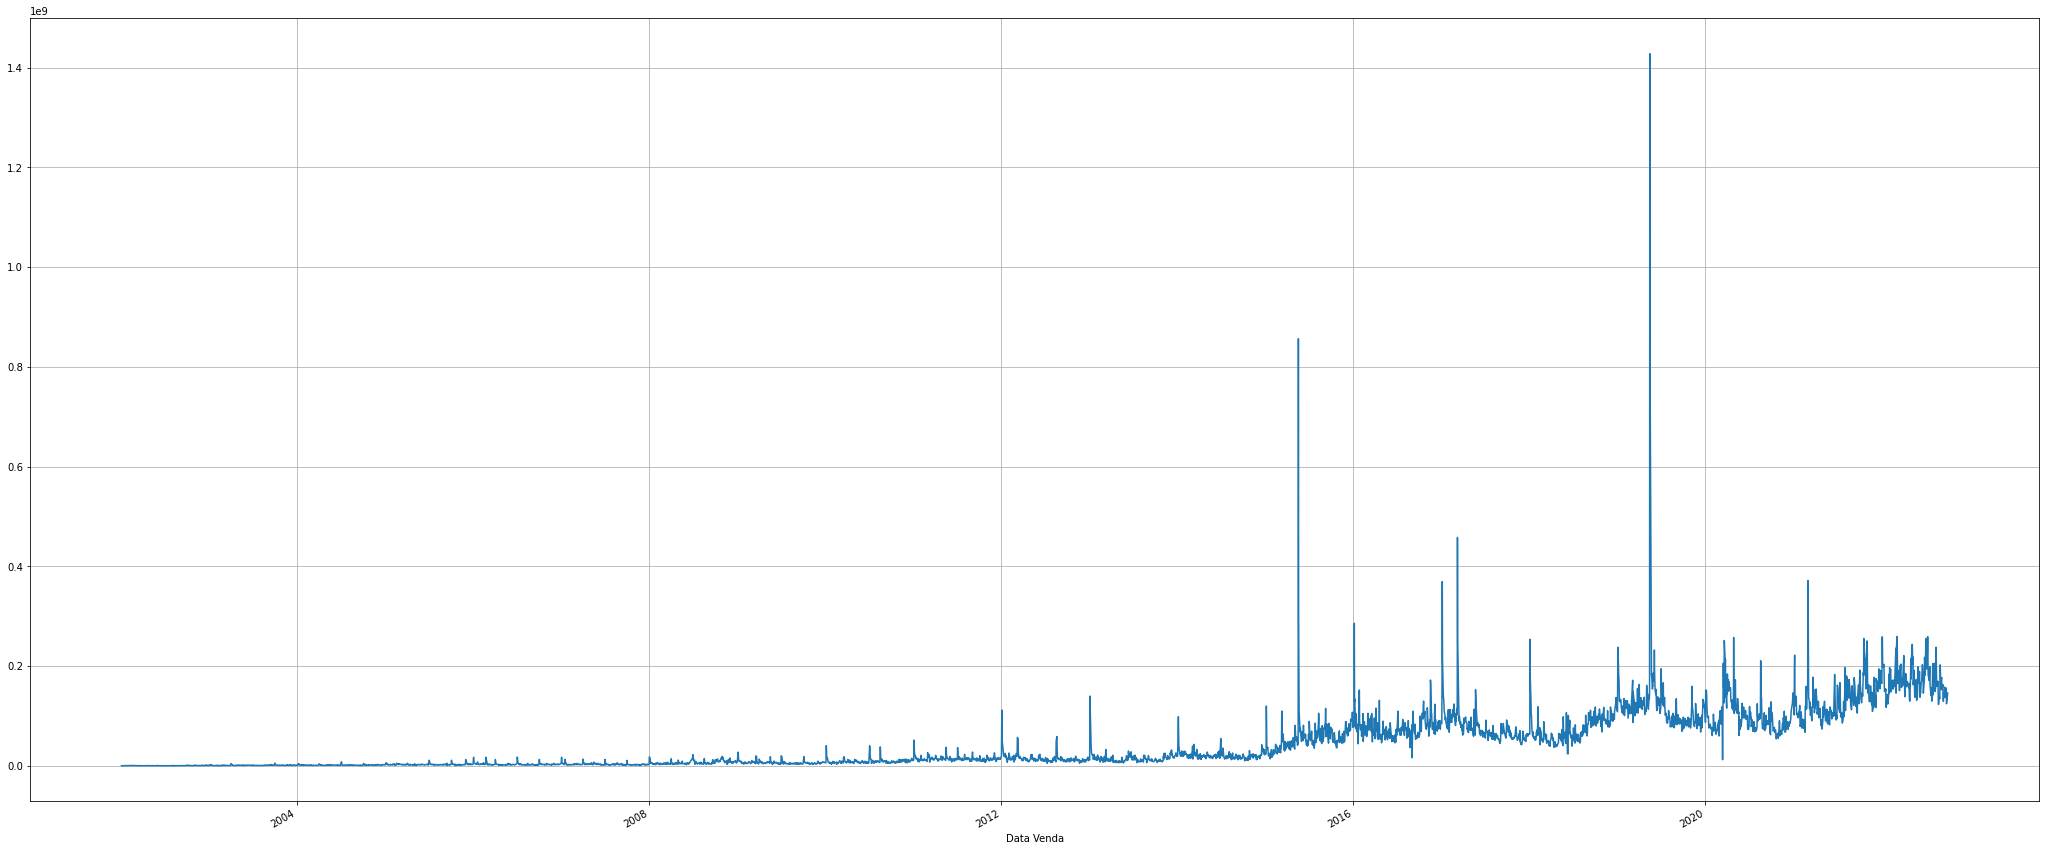

In [32]:
vendas['Valor'].groupby('Data Venda').sum().plot(grid=True)

4. Recompras Tesouro Direto

Esse conjunto de dados contém a listagem dos títulos que foram entregues pelo investidor antes do vencimento. Estão listados por dia e por título. Frequência: Atualização diária com dados até dois dias antes à data do arquivo;

4.1 Buscando Dados

In [33]:
recompras = busca_recompras_tesouro()
recompras.sort_index(inplace=True)
recompras

Quantidade  \
Tipo Titulo                        Vencimento do Titulo Data Resgate               
Tesouro IGPM+ com Juros Semestrais 2005-07-01           2005-01-13          2.00   
                                                        2005-02-03          1.00   
                                                        2005-03-03          2.00   
                                                        2005-03-10          1.00   
                                                        2005-03-24          0.20   
                                                        2005-03-31          0.60   
                                                        2005-04-14          3.60   
                                                        2005-04-22         36.00   
                                                        2005-06-02          6.40   
                                   2005-12-01           2005-01-06        141.20   
...                                                                          ...   
Tesouro Selic                      2027-03-01           2022-09-20       1998.47   
                                                        2022-09-21       1565.52   
                                                        2022-09-22       1660.40   
                                                        2022-09-23       1488.42   
                                                        2022-09-26       2212.99   
                                                        2022-09-27       1902.16   
                                                        2022-09-28       1686.77   
                                                        2022-09-29       2074.62   
                                                        2022-09-30       1745.25   
                                                        2022-10-03       2370.95   

                                                                            Valor  
Tipo Titulo                        Vencimento do Titulo Data Resgate               
Tesouro IGPM+ com Juros Semestrais 2005-07-01           2005-01-13        3545.04  
                                                        2005-02-03        1783.97  
                                                        2005-03-03        3595.96  
                                                        2005-03-10        1803.81  
                                                        2005-03-24         364.14  
                                                        2005-03-31        1098.15  
                                                        2005-04-14        6666.62  
                                                        2005-04-22       66912.84  
                                                        2005-06-02       11999.94  
                                   2005-12-01           2005-01-06      249321.07  
...                                                                           ...  
Tesouro Selic                      2027-03-01           2022-09-20    24154852.54  
                                                        2022-09-21    18932328.44  
                                                        2022-09-22    20090662.48  
                                                        2022-09-23    18019726.76  
                                                        2022-09-26    26807563.76  
                                                        2022-09-27    23055605.86  
                                                        2022-09-28    20456700.36  
                                                        2022-09-29    25174529.46  
                                                        2022-09-30    21189039.15  
                                                        2022-10-03    28800512.42  

[53528 rows x 2 columns]

<AxesSubplot:xlabel='Data Resgate'>

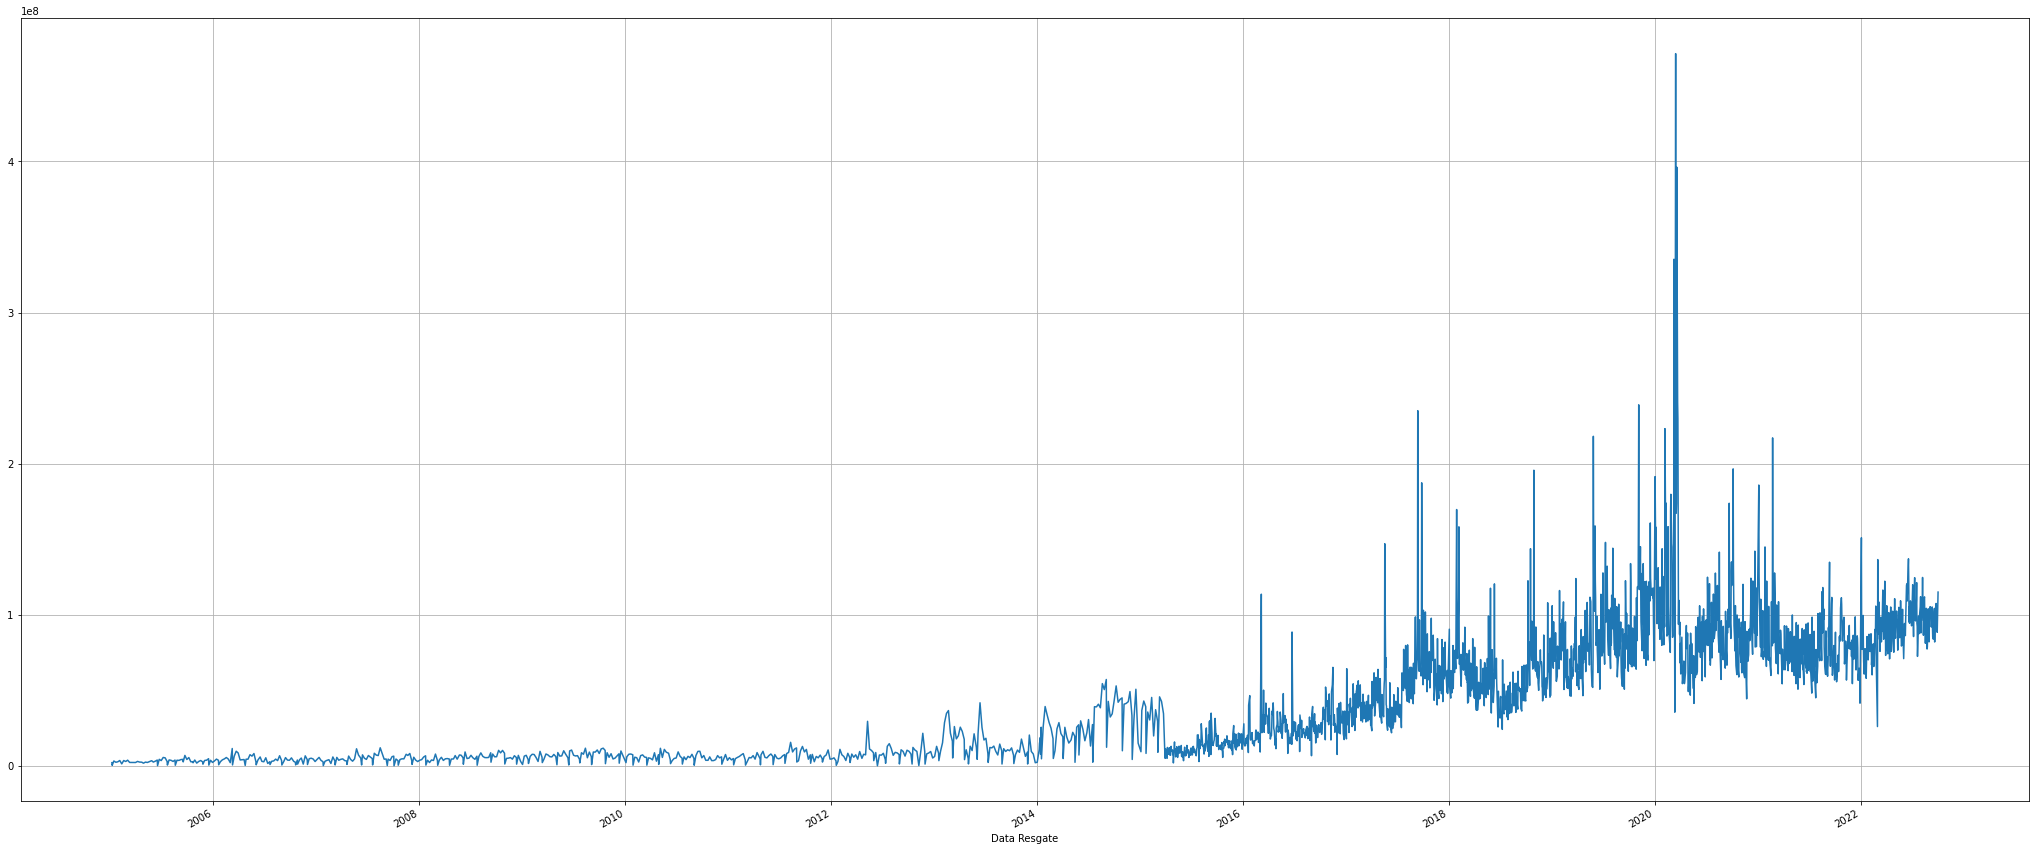

In [34]:
recompras['Valor'].groupby('Data Resgate').sum().plot(grid=True)